# Utkarsh Tripathi

## Credit Risk Modelling

* *Credit risk is an important topic in the field of finance because banks and other financial institutions heavily invest in reducing their credit risk.*

* *There is an element of risk when these financial institutions lend money to clients. So ideally,to reduce their risk and loan money only to clients they are sure are going to pay them back.*

**Project goal**:
The objective of this project is to build a model to predict probability of a client defaulting a loan.
* Defaulting on a loan is the failure of a borrower to pay the principal or interest on a security or loan.


* *The dataset has been collected from the UCI machine learning repository*



* **The following steps will be followed in building the model.**

* Data preparation and Pre-processing
* Exploratory Data Analysis
* Feature Engineering and Selection
* Model Development and Model Evaluation
* Hyperparameter Tuning

In [2]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize']=(12,5)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.max_columns',None)

from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score , confusion_matrix , classification_report,roc_auc_score , roc_curve
from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
#importing the data
data = pd.read_excel('Credit_Risk_PD_Model_Dataset.xlsx')
data.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,LONG_TERM_DEBT_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,NET_TRADE_RECV_1,NON_CURRENT_LIABILITIES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TOTAL_INVENTORY_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,Long_Term_Debt_to_Equity_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,323773.0,NaN,476381.0,516192.0,78247.0,357842.0,1953656.0,2527734.0,59291.0,1101146.0,1953654.0,150315.0,1.0,121478.0,1101146.0,812561.0,2430037.0,1360855.0,NaN,2527734.0,-39811.0,1.6745,0.5025,0.3344,1.3549,1.4356,0.6656,0.2630,6.0353,0.6932,0.1332,0.9229,0.8626,0.1960,NaN,5.9466,-0.0501,0.0
1,EduArtsHealthSocial,18593.0,11753.0,21913.0,257405.0,6988.0,42274.0,668688.0,124057.0,6456.0,NaN,609921.0,28829.0,58767.0,NaN,NaN,433195.0,690600.0,255496.0,NaN,135810.0,-235493.0,0.6824,1.6829,0.6273,NaN,2.3872,0.3727,0.1655,6.5479,0.1642,0.0269,0.0851,NaN,0.0317,91.3457,21.2275,-0.0472,0.0
2,Retail,202720.0,3420276.0,665190.0,373352.0,76899.0,406223.0,542187.0,1577802.0,11742.0,205530.0,520062.0,272950.0,22124.0,71143.0,282894.0,551127.0,1207376.0,337678.0,318856.0,4998079.0,291837.0,0.6383,0.8398,0.4565,0.3729,1.5401,0.5435,1.2030,34.5947,1.0880,0.1679,1.7817,0.7335,0.5509,31.5682,5.4611,-0.3119,1.0
3,Agriculture - Other,87515.0,7905311.0,1820195.0,2153519.0,702651.0,675750.0,7409750.0,3242324.0,88218.0,2684192.0,7409681.0,-115120.0,0.0,495837.0,6239035.0,837370.0,9229945.0,3524366.0,539592.0,11147635.0,-333324.0,4.2087,0.0998,0.0907,3.2054,2.1024,0.9093,0.1917,7.6600,0.3138,0.0095,0.8452,0.2709,0.1972,29.0853,-1.0327,-0.0209,0.0
4,EduArtsHealthSocial,272938.0,237933.0,381958.0,681622.0,NaN,-515748.0,7395426.0,540762.0,179654.0,3418577.0,7395426.0,-695403.0,0.0,84294.0,7937407.0,-855472.0,7777384.0,3418577.0,NaN,778696.0,-299664.0,-4.0618,-0.0976,-0.1082,-4.0618,2.1633,1.1082,-0.1509,-2.8708,-0.7566,0.0351,0.5604,0.5241,0.0491,69.4446,-89.3035,-0.0241,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Industry                            573 non-null    object 
 1   CASH_AND_CASH_EQUIVALENTS_floored1  573 non-null    float64
 2   COST_OF_GOODS_SOLD_1                518 non-null    float64
 3   CURRENT_ASSETS_1                    573 non-null    float64
 4   CURRENT_LIABILITIES_1               573 non-null    float64
 5   DEPRECIATION_1                      534 non-null    float64
 6   EBITDA_1                            573 non-null    float64
 7   FIXED_AND_NON_CURRENT_ASSETS_1      561 non-null    float64
 8   GROSS_PROFIT_1                      573 non-null    float64
 9   INTEREST_EXPENSE_1                  480 non-null    float64
 10  LONG_TERM_DEBT_1                    359 non-null    float64
 11  NET_FIXED_ASSETS_1                  555 non-n

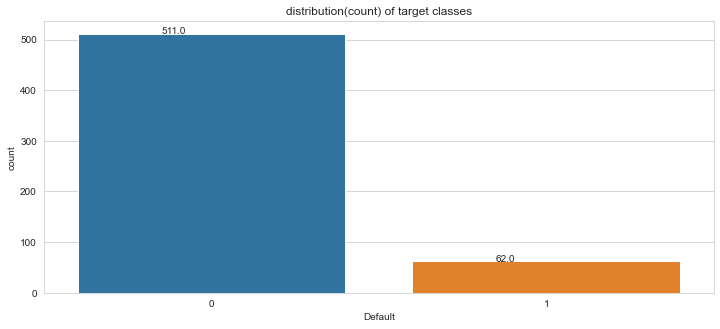

In [5]:
#checking for the distribution(count) of target classes
data['Default'] = data['Default'].astype('int')
ax = sns.countplot(data['Default'])
plt.title('distribution(count) of target classes')
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [6]:
#checking for missing values in the data
round(data.isna().sum()/len(data)*100,2).sort_values(ascending=False)

Long_Term_Debt_to_Equity_1            37.35
LONG_TERM_DEBT_1                      37.35
NON_CURRENT_LIABILITIES_1             21.64
Liquidity_Ratio_1                     17.10
NET_TRADE_RECV_1                      17.10
INTEREST_EXPENSE_1                    16.23
EBITDA_to_Interest_1                  16.23
TOTAL_INVENTORY_1                     16.06
NetFixedAssets_to_TotalDebt_1         10.12
Gross_Margin_perc_1                    9.60
COST_OF_GOODS_SOLD_1                   9.60
TOTAL_DEBT_1                           8.03
EBITDA_to_total_Debt_1                 8.03
Debt_to_TNW_1                          8.03
DEPRECIATION_1                         6.81
NET_FIXED_ASSETS_1                     3.14
FIXED_AND_NON_CURRENT_ASSETS_1         2.09
Total_Liab_to_Total_Assets_2_1         1.92
Curr_to_Total_Assets_1                 0.00
Current_Ratio_1                        0.00
Net_Income_Margin_1                    0.00
Cash_to_Total_assets_1                 0.00
EBITDA_to_curr_liab_1           

* considering a threshold of 25% for the missing values and,
* dropping the features which are having missing values more than the threshold

### Removing features with more than 25% missing values

In [7]:
#dropping missing values
data.dropna(axis=1,thresh=round(len(data)-len(data)/100*25),inplace=True)

In [8]:
#checking for the distribution of independent variables
data.describe().apply(lambda s : s.apply('{0:.5f}'.format))

,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,NET_TRADE_RECV_1,NON_CURRENT_LIABILITIES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TOTAL_INVENTORY_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
count,573.00000,518.00000,573.00000,573.00000,534.00000,573.00000,561.00000,573.00000,480.00000,555.00000,573.00000,573.00000,475.00000,449.00000,573.00000,573.00000,527.00000,481.00000,573.00000,573.00000,527.00000,573.00000,573.00000,515.00000,573.00000,527.00000,480.00000,573.00000,573.00000,573.00000,475.00000,573.00000,518.00000,573.00000,562.00000,573.00000
mean,260737.46422,2418543.23359,1882030.51832,1519872.27051,95440.10300,354311.38220,1912062.53654,1338839.79930,37752.21875,1577285.54054,200282.65271,77810.80977,948929.48000,946893.97550,1098391.24956,3754049.83421,1054720.06072,494918.04990,3524900.16405,362158.23909,1.71891,1.48373,0.41628,3.09437,0.58372,1.56333,164.78119,0.64531,0.10153,1.70153,0.90007,0.47859,43.99999,8.27615,-0.07344,0.10820
std,821575.22736,2862968.43545,3882481.64782,3559609.21764,155056.63976,852420.84859,3196332.90251,1624553.54597,59755.10173,2705555.87478,505163.19864,542222.73294,3147155.69300,1857338.14416,2243664.19851,5029047.97018,1785106.14049,697126.24046,3754045.76815,1324762.92532,7.39441,2.48059,0.29911,6.74730,0.29918,5.03503,774.91878,1.12734,0.15472,1.96790,1.04293,0.34451,22.92265,24.89123,0.20666,0.31091
min,-644364.00000,5116.00000,1936.00000,228.00000,271.00000,-7324453.00000,792.00000,-313885.00000,1.00000,792.00000,-3524806.00000,0.00000,37.00000,1637.00000,-6832620.00000,124669.00000,2149.00000,1244.00000,29332.00000,-4156248.00000,-24.36330,-0.54410,-1.19340,0.00380,0.04280,-6.01020,-211.97270,-1.72840,0.00000,0.02000,0.00750,0.00400,1.81380,-192.99510,-0.74580,0.00000
25%,790.00000,315268.00000,236199.00000,253171.00000,14941.00000,73034.00000,271800.00000,336650.00000,8421.00000,213013.00000,17414.00000,0.00000,23299.00000,118346.00000,184714.00000,1079525.00000,214377.00000,38496.00000,597847.00000,-132957.00000,0.19200,0.30590,0.23420,0.78130,0.37380,0.11400,3.59650,0.12090,0.00080,0.66430,0.16450,0.14750,25.50270,1.51350,-0.12857,0.00000
50%,49605.00000,1024016.00000,770200.00000,706407.00000,45219.00000,189612.00000,782718.00000,718388.00000,17734.00000,757007.00000,108816.00000,0.00000,154097.00000,355382.00000,588908.00000,2218853.00000,503951.00000,218170.00000,1656742.00000,113480.00000,0.58750,0.72710,0.42100,1.61420,0.57900,0.39040,9.20670,0.31380,0.02940,1.16600,0.66570,0.39100,37.89770,5.68280,-0.04835,0.00000
75%,284872.00000,4245791.75000,2180921.00000,1656906.00000,111614.25000,489874.00000,2324411.00000,1749496.00000,37838.00000,1943540.00000,269596.00000,0.00000,788094.00000,798854.00000,1597267.00000,4257515.00000,1117009.00000,609189.00000,5809665.00000,615764.00000,1.33010,1.67550,0.62620,3.02630,0.76580,1.24455,34.88610,0.80410,0.12930,1.88810,1.14450,0.83490,57.77420,16.78400,0.01170,0.00000
max,4052236.00000,12212492.00000,34522271.00000,32716574.00000,1334359.00000,7660463.00000,24511837.00000,12018269.00000,403764.00000,24511837.00000,3246092.00000,8683449.00000,27535344.00000,11813880.00000,19649051.00000,34522271.00000,14641232.00000,4000227.00000,13767886.00000,6006688.00000,55.95800,18.38090,0.95580,78.06120,2.19470,45.18560,6086.43800,8.46130,0.70830,14.25060,6.90000,1.00000,97.94590,108.77070,1.94080,1.00000


#### Checking for the distribution of the features with respect to the different industries

In [9]:
data['Industry'].unique()

array(['Wholesale', 'EduArtsHealthSocial', 'Retail',
       'Agriculture - Other', 'InformationCommunication', 'Utilities',
       'Construction', 'Manufacture', 'Hospitality',
       'Agriculture - Dairy', 'Services_ProfessionalSciTech',
       'Services_SupportAdmin', 'Transport', 'Financial', 'Mining'],
      dtype=object)

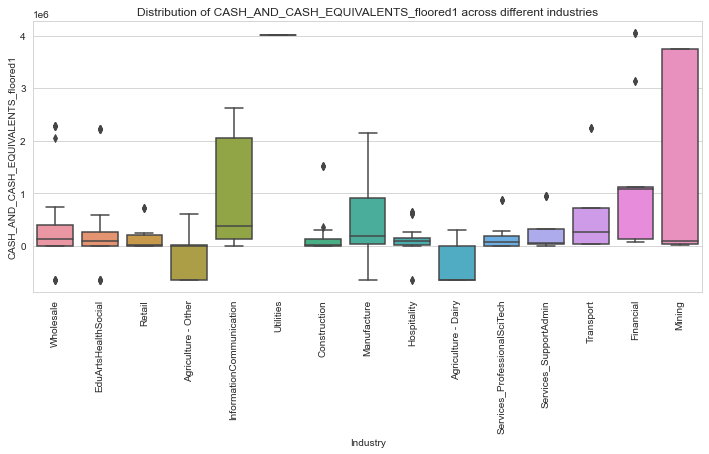

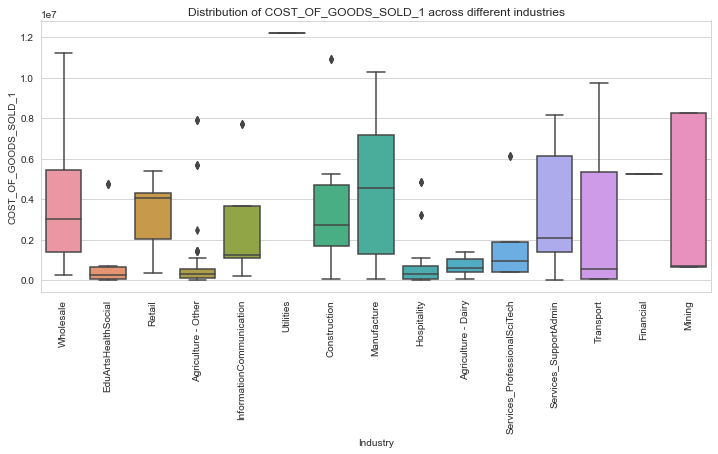

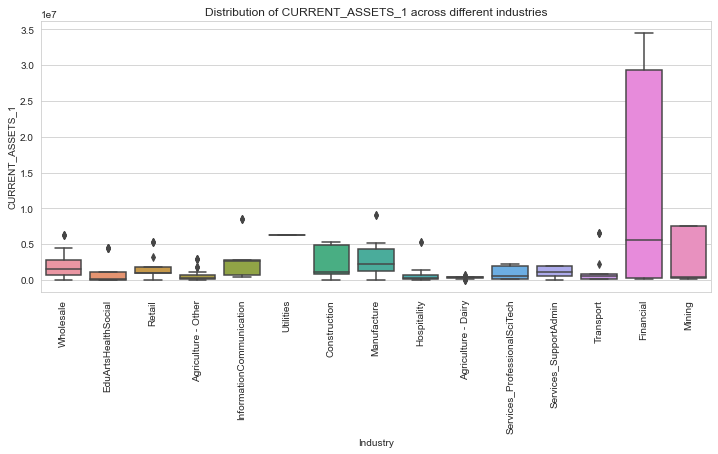

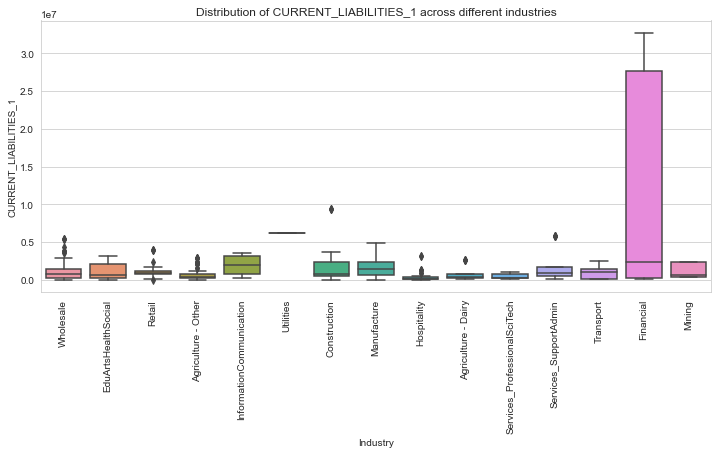

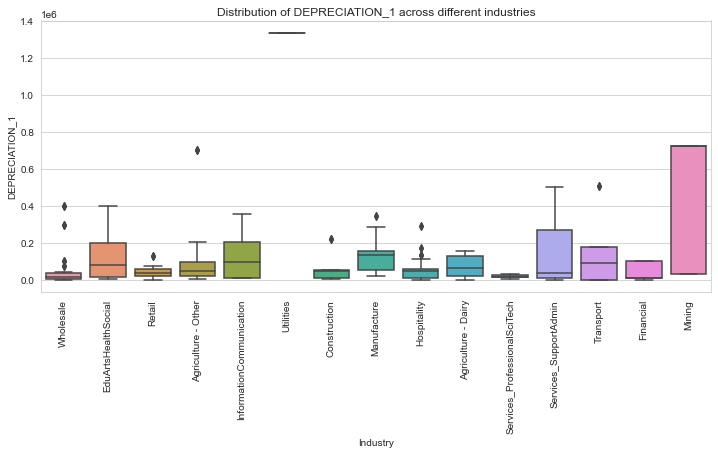

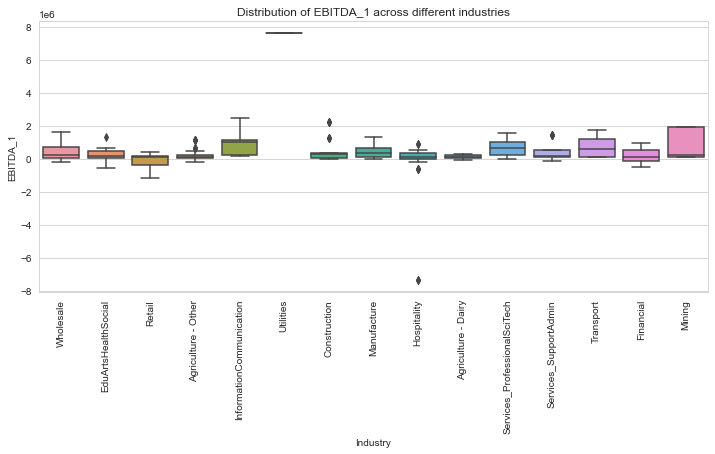

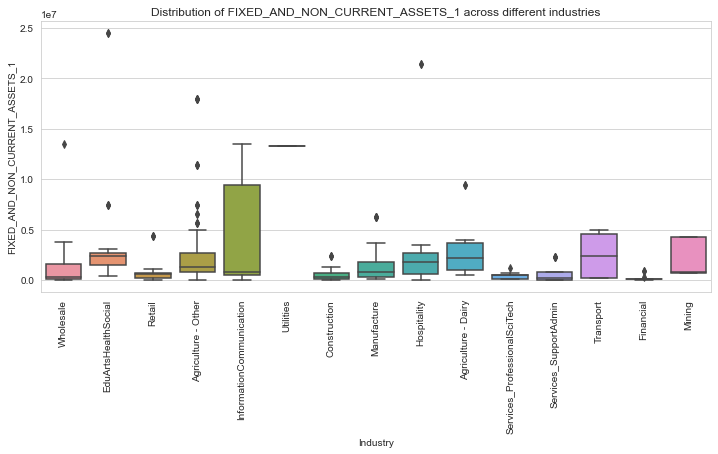

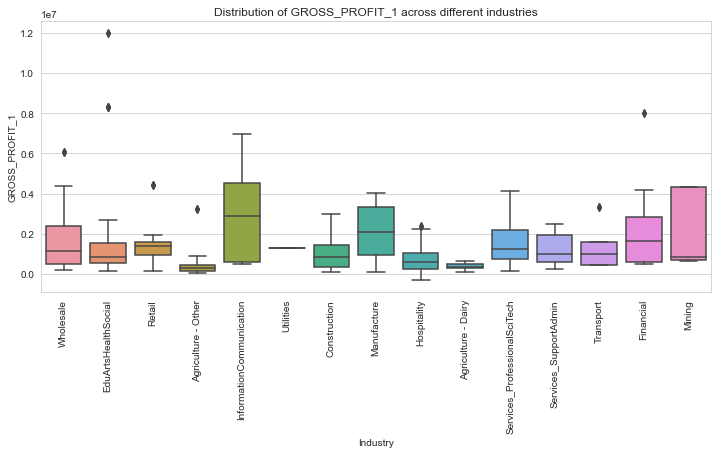

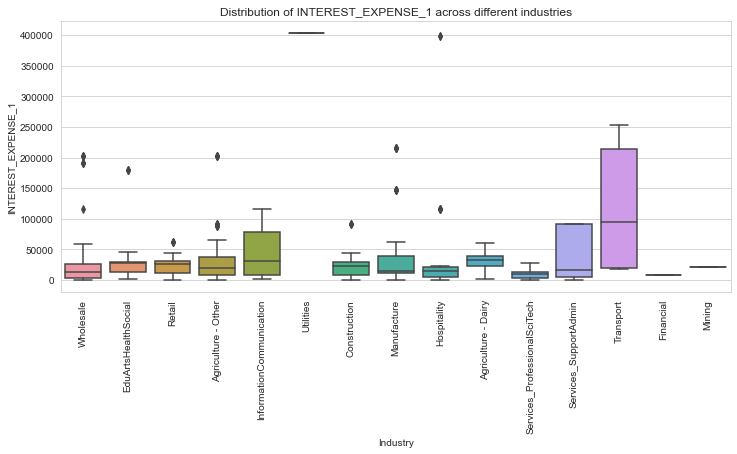

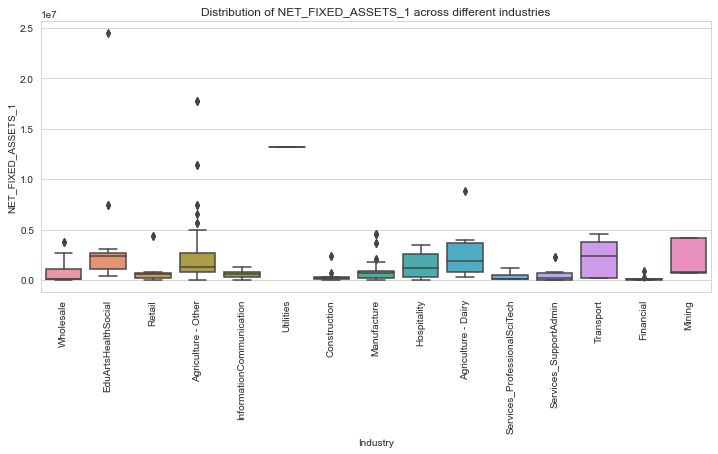

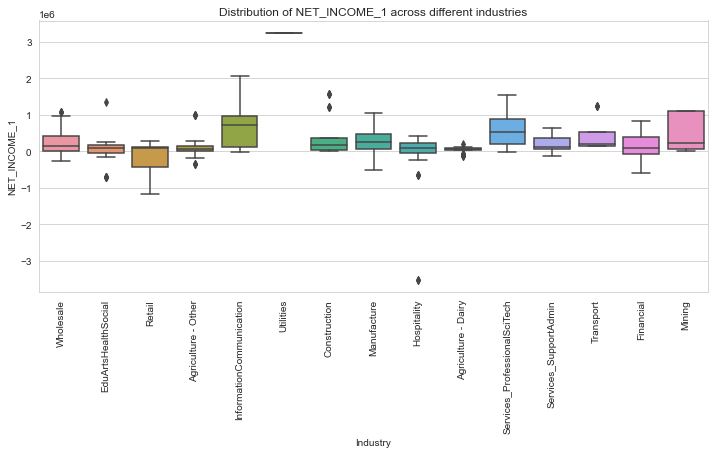

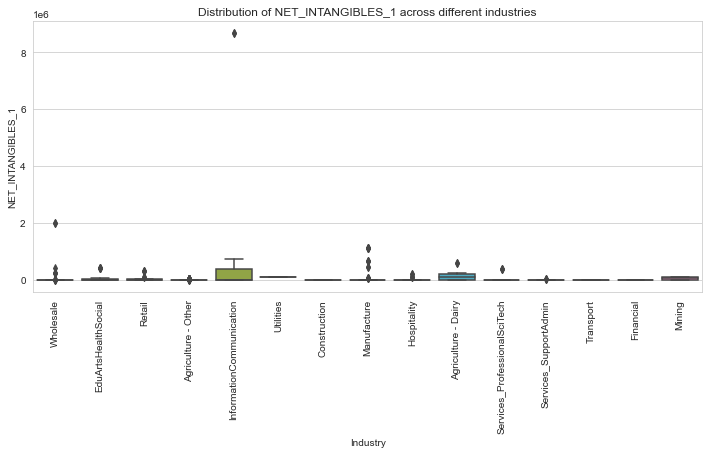

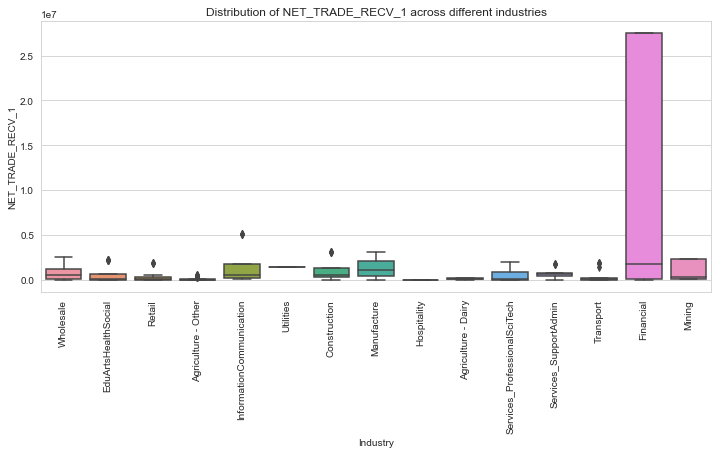

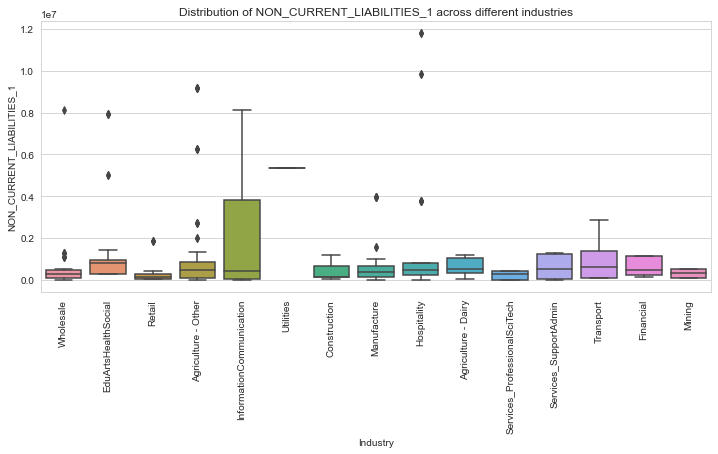

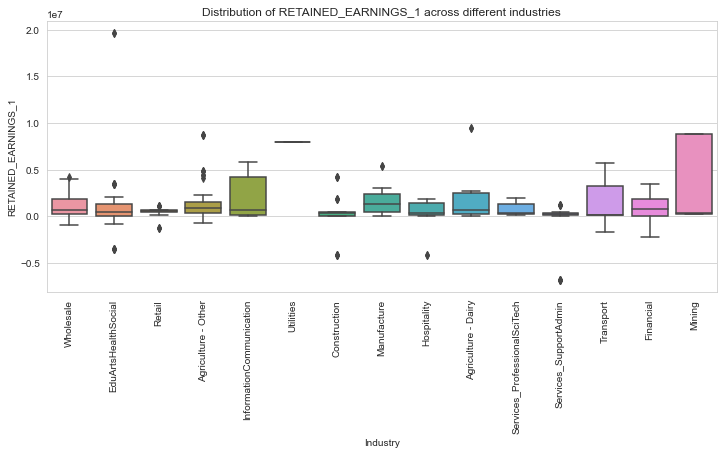

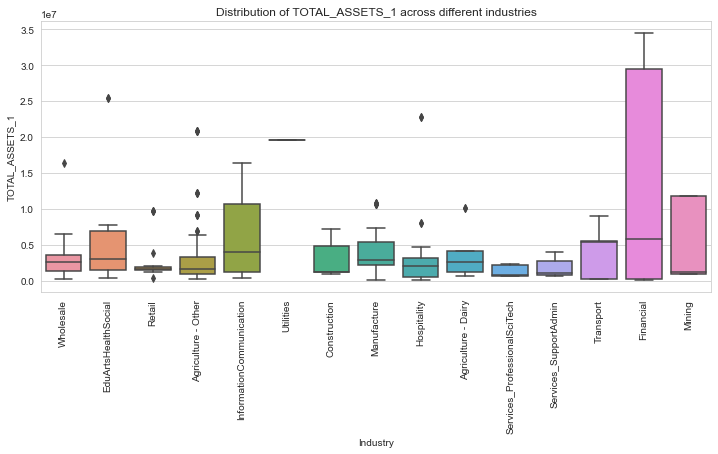

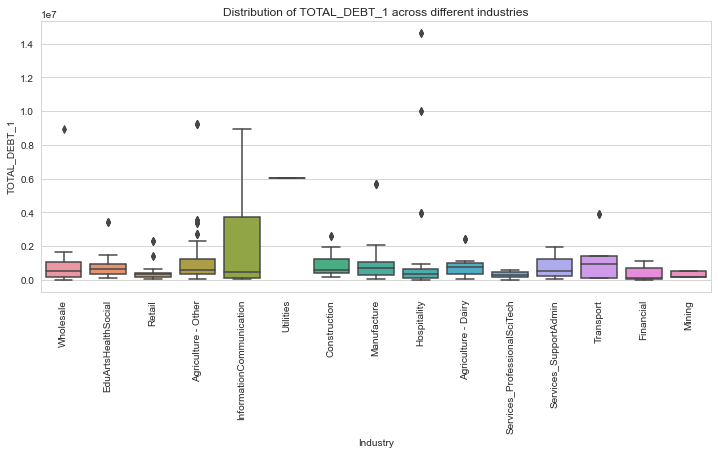

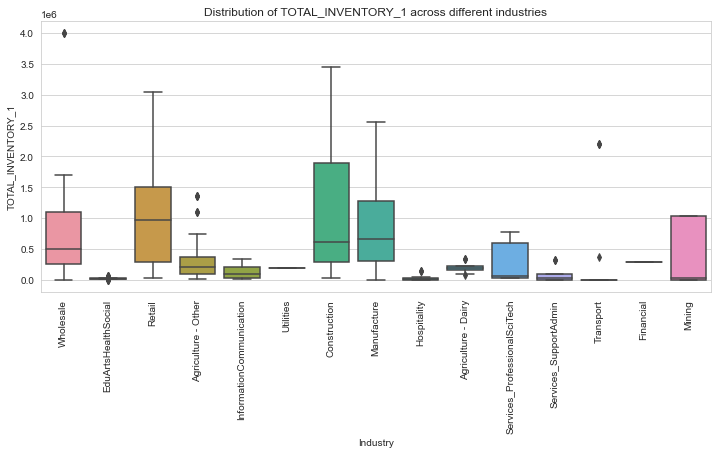

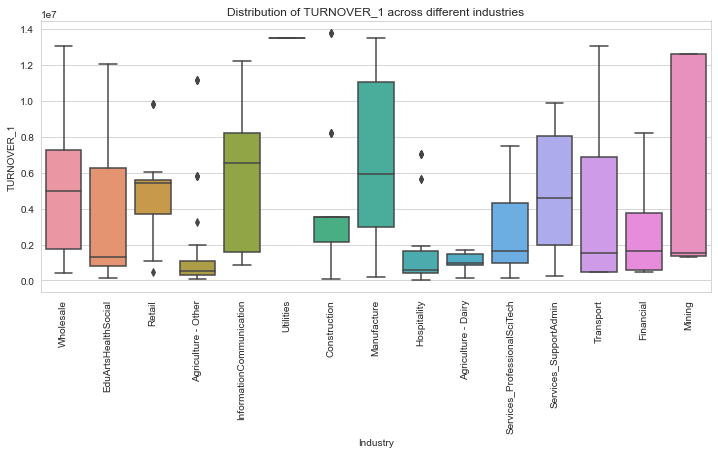

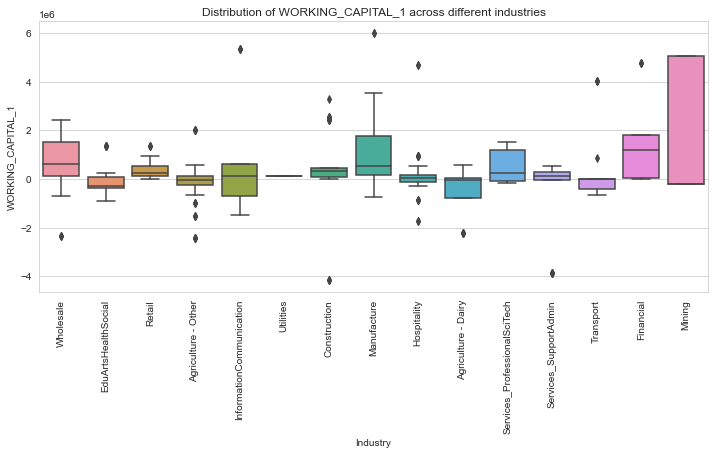

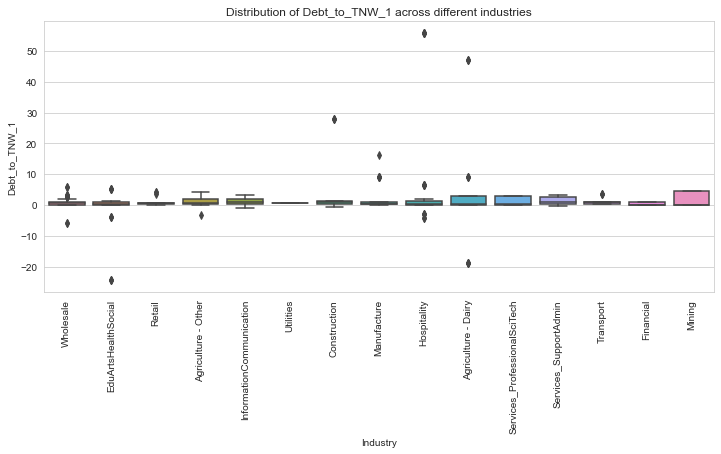

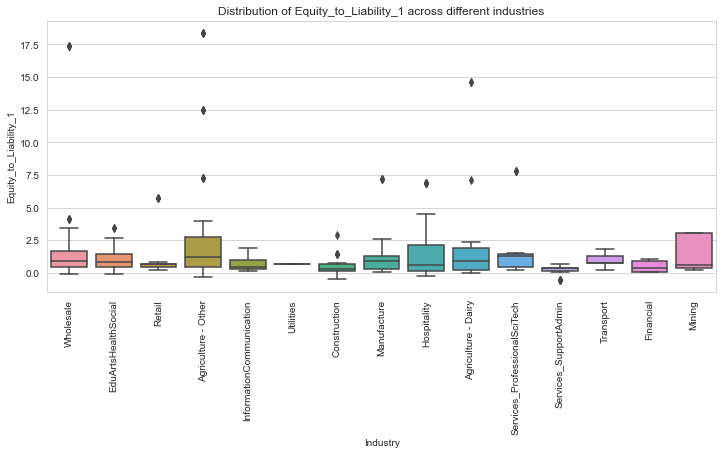

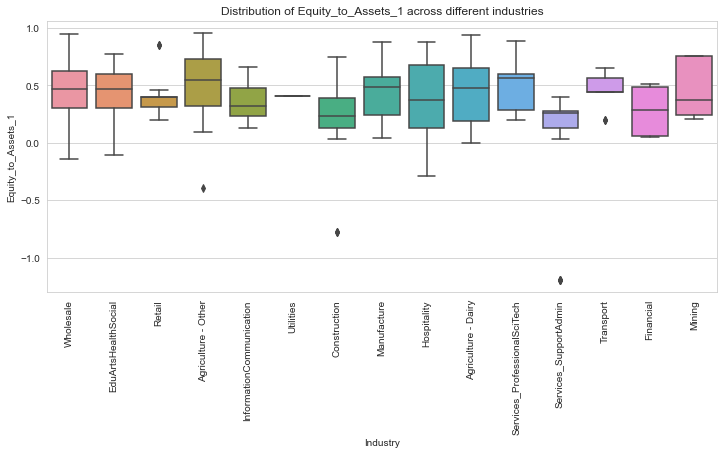

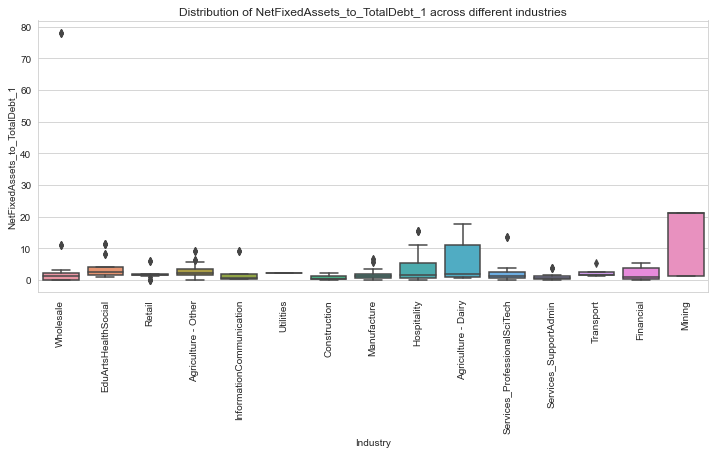

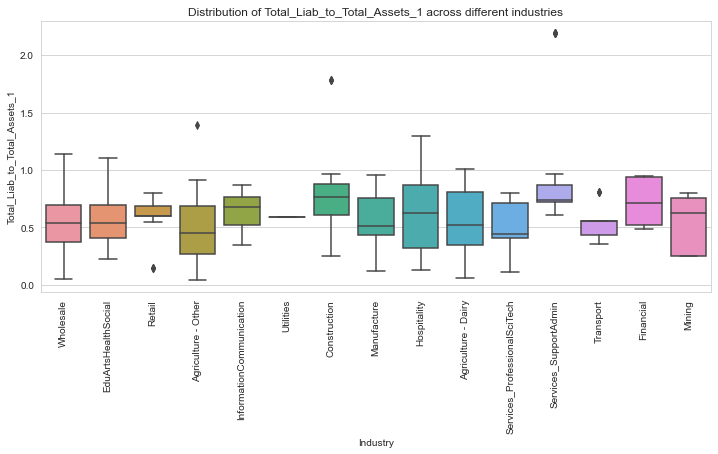

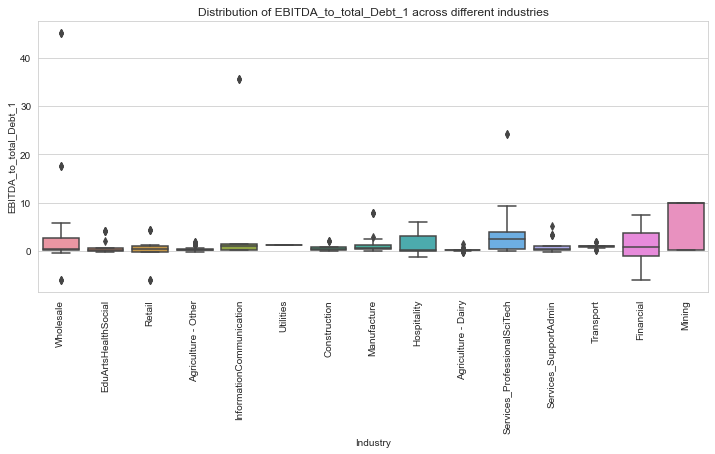

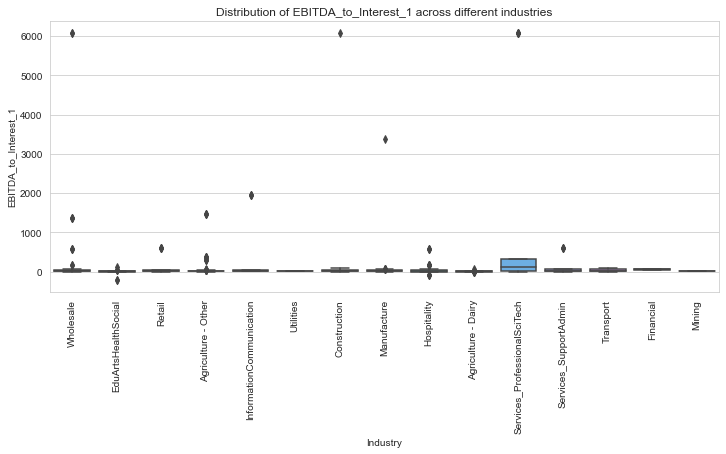

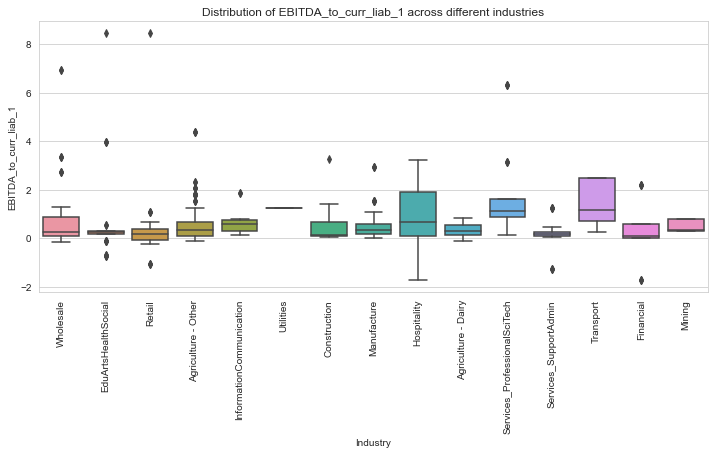

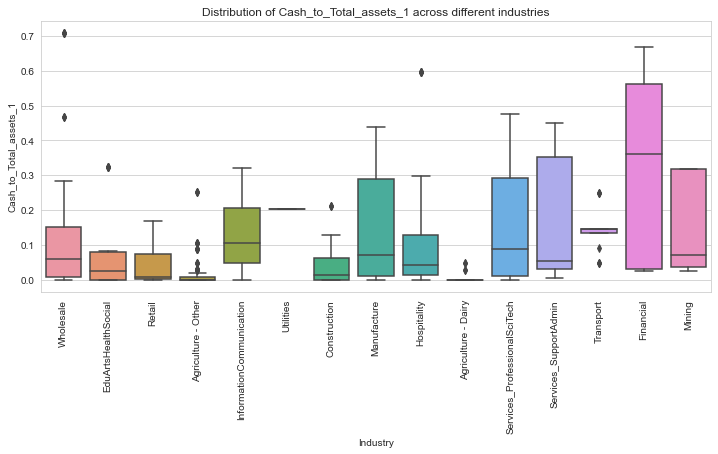

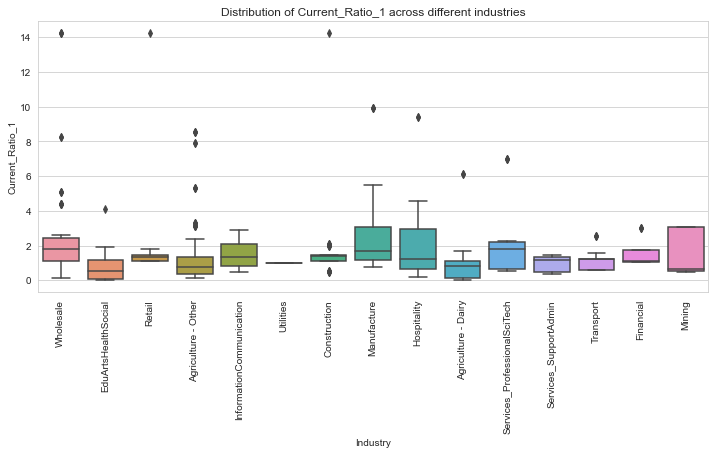

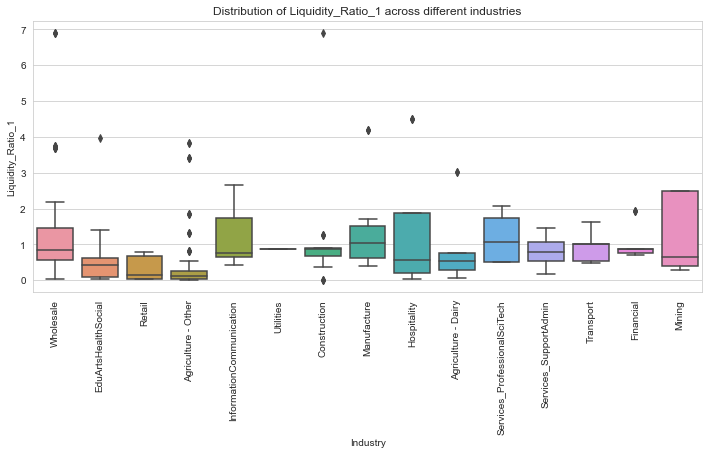

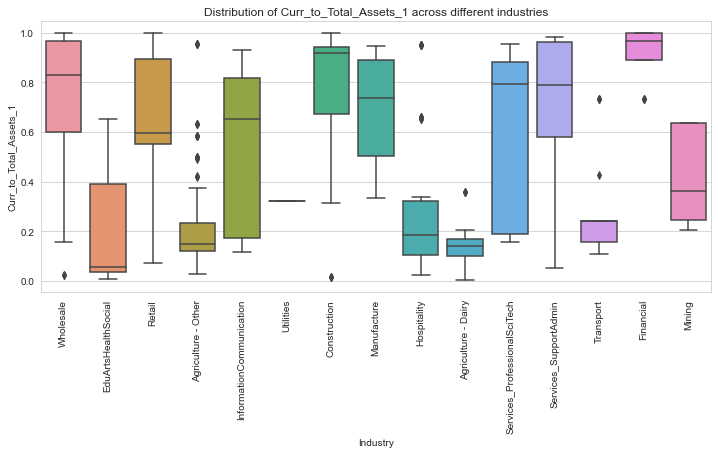

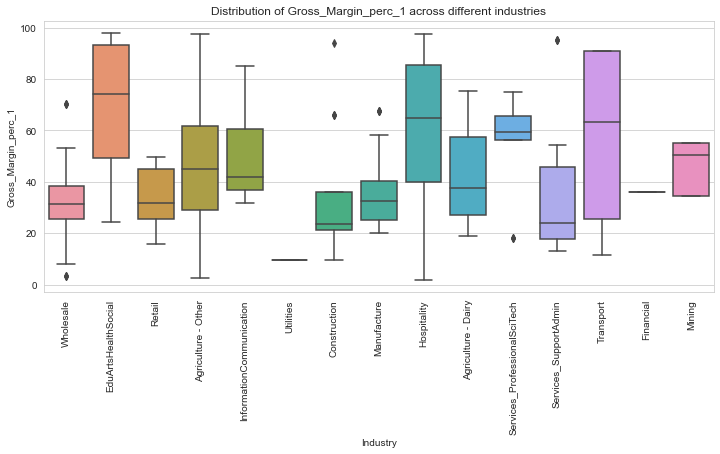

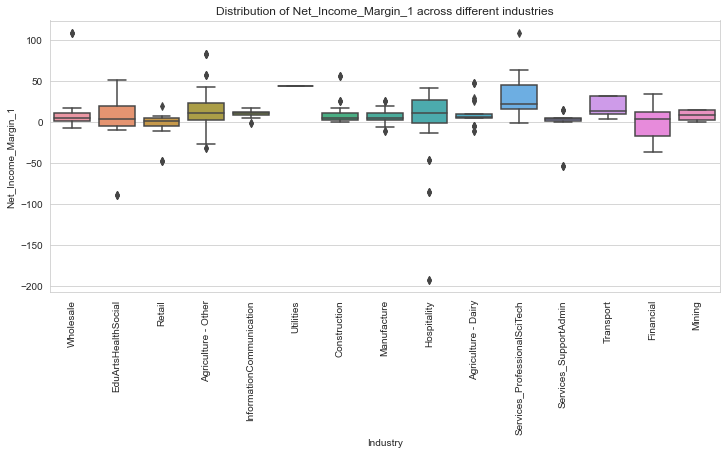

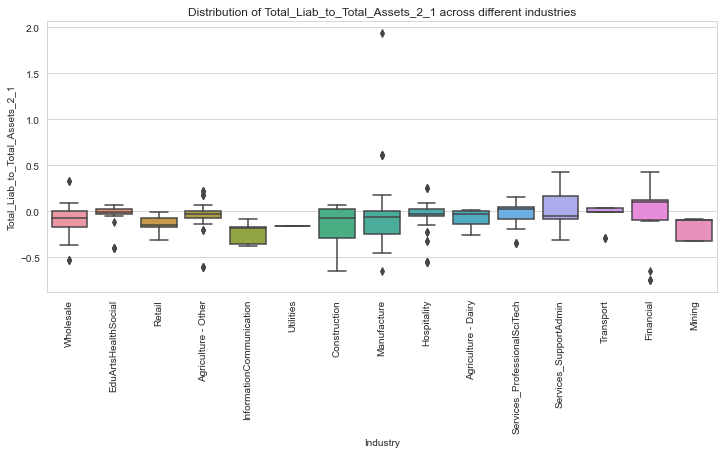

In [10]:
numerical_features = data.select_dtypes(['float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(12,5))
    sns.boxplot(y=data[feature],x=data['Industry'])
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature} across different industries')

* The numerical features varies across different industries
* so we will replace the missing values with the median of their respective industries

In [11]:
#missing value imputation with median
for feature in numerical_features:
    data[feature].fillna(data.groupby('Industry')[feature].transform('median'),inplace=True)

In [12]:
data.isna().any().any()

False

##### Outlier Handling
handling the outliers by quantile based flooring and capping with their respective industries

In [13]:
#outlier treatment
data = data.groupby(data.Industry.values).transform(lambda x: np.clip(x,x.quantile(0.05),x.quantile(0.95))if x.name in numerical_features else x)
data.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,NET_TRADE_RECV_1,NON_CURRENT_LIABILITIES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TOTAL_INVENTORY_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,323773.0,2995379.0,476381.0,516192.0,78247.0,357842.0,1953656.0,2527734.0,59291.0,1953654.0,150315.0,1.0,121478.0,1101146.0,812561.0,2430037.0,1360855.0,500697.0,2527734.0,-39811.0,1.6745,0.5025,0.3344,1.4356,0.6656,0.2630,6.0353,0.6932,0.1332,0.9229,0.8626,0.1960,31.23095,5.9466,-0.0501,0
1,EduArtsHealthSocial,18593.0,11753.0,21913.0,257405.0,6988.0,42274.0,668688.0,124057.0,6456.0,609921.0,28829.0,58767.0,84294.0,798854.0,433195.0,690600.0,255496.0,21051.0,135810.0,-235493.0,0.6824,1.6829,0.6273,2.3872,0.3727,0.1655,6.5479,0.1642,0.0269,0.0851,0.4109,0.0317,91.34570,21.2275,-0.0472,0
2,Retail,202720.0,3420276.0,665190.0,373352.0,76899.0,406223.0,542187.0,1577802.0,11742.0,520062.0,272950.0,22124.0,71143.0,282894.0,551127.0,1207376.0,337678.0,318856.0,4998079.0,291837.0,0.6383,0.8398,0.4565,1.5401,0.5435,1.2030,34.5947,1.0880,0.1679,1.7817,0.7335,0.5509,31.56820,5.4611,-0.3119,1
3,Agriculture - Other,87515.0,2349333.7,1753108.7,2153519.0,134105.0,657162.4,7409750.0,763895.9,88218.0,7409681.0,-115120.0,0.0,328534.0,5889711.9,837370.0,9229945.0,3508001.0,539592.0,3107799.8,-333324.0,4.2087,0.1244,0.1106,2.1024,0.8894,0.1917,7.6600,0.3138,0.0095,0.8452,0.2709,0.1972,29.08530,-1.0327,-0.0209,0
4,EduArtsHealthSocial,272938.0,237933.0,381958.0,681622.0,81766.0,-515748.0,7395426.0,540762.0,179654.0,7395426.0,-695403.0,0.0,84294.0,7937407.0,-855472.0,7777384.0,3418577.0,21051.0,778696.0,-299664.0,-4.0618,-0.0976,-0.1082,2.1633,1.1082,-0.1509,-2.8708,-0.7566,0.0351,0.5604,0.5241,0.0491,69.44460,-89.3035,-0.0241,0


### EDA

Default                                0          1
Industry                                           
Agriculture - Dairy            72.000000  28.000000
Agriculture - Other            81.300813  18.699187
Construction                   79.310345  20.689655
EduArtsHealthSocial            82.926829  17.073171
Financial                      95.454545   4.545455
Hospitality                    94.000000   6.000000
InformationCommunication       68.421053  31.578947
Manufacture                    95.774648   4.225352
Mining                        100.000000   0.000000
Retail                         89.285714  10.714286
Services_ProfessionalSciTech  100.000000   0.000000
Services_SupportAdmin         100.000000   0.000000
Transport                     100.000000   0.000000
Utilities                     100.000000   0.000000
Wholesale                      96.153846   3.846154


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Agriculture - Dairy'),
  Text(1, 0, 'Agriculture - Other'),
  Text(2, 0, 'Construction'),
  Text(3, 0, 'EduArtsHealthSocial'),
  Text(4, 0, 'Financial'),
  Text(5, 0, 'Hospitality'),
  Text(6, 0, 'InformationCommunication'),
  Text(7, 0, 'Manufacture'),
  Text(8, 0, 'Mining'),
  Text(9, 0, 'Retail'),
  Text(10, 0, 'Services_ProfessionalSciTech'),
  Text(11, 0, 'Services_SupportAdmin'),
  Text(12, 0, 'Transport'),
  Text(13, 0, 'Utilities'),
  Text(14, 0, 'Wholesale')])

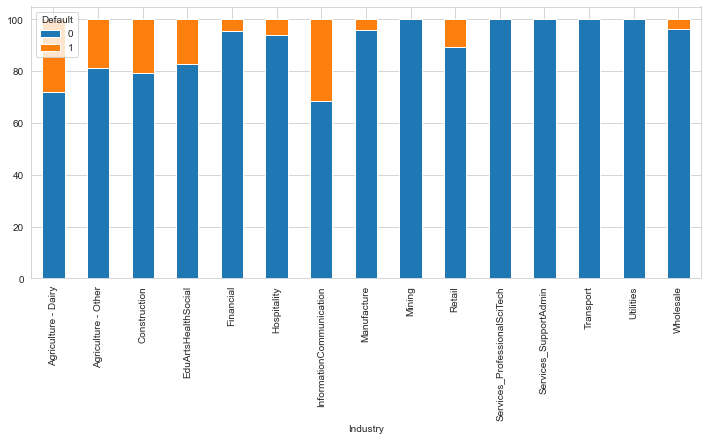

In [15]:
prop_by_industry = pd.crosstab(data['Industry'],data['Default']).apply(lambda x:x/x.sum()*100,axis=1)
print(prop_by_industry)
prop_by_industry.plot(kind='bar',stacked=True)
plt.xticks(rotation=90)

* Among all the industries InformationCommunication and Agriculture-diary has the highest default rate
* Agriculture other , construction and EduArtsHealthSocial have default rate around 20%

<AxesSubplot:>

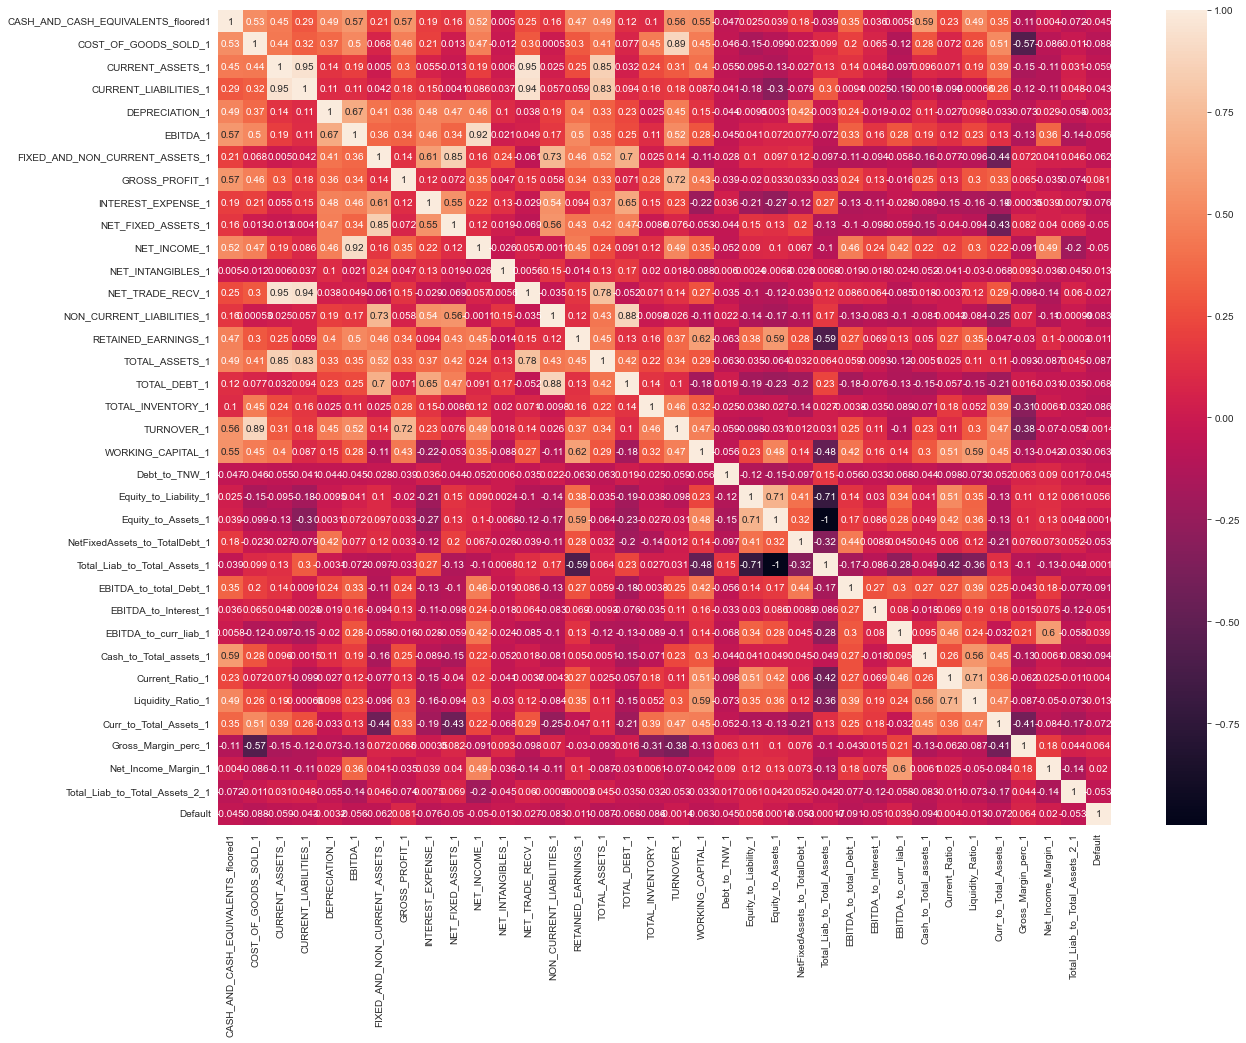

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

some of the features are highly correlated to each other i,e Multicollinearity

In [17]:
#scaling the data using standard scaler

scaler = StandardScaler()
data_trf = data.copy()
data_trf[numerical_features] = scaler.fit_transform(data_trf[numerical_features])
data_trf.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,NET_FIXED_ASSETS_1,NET_INCOME_1,NET_INTANGIBLES_1,NET_TRADE_RECV_1,NON_CURRENT_LIABILITIES_1,RETAINED_EARNINGS_1,TOTAL_ASSETS_1,TOTAL_DEBT_1,TOTAL_INVENTORY_1,TURNOVER_1,WORKING_CAPITAL_1,Debt_to_TNW_1,Equity_to_Liability_1,Equity_to_Assets_1,NetFixedAssets_to_TotalDebt_1,Total_Liab_to_Total_Assets_1,EBITDA_to_total_Debt_1,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,0.082289,0.227524,-0.353960,-0.277880,-0.099619,-0.017990,0.118286,0.807132,0.523074,0.268804,-0.118348,-0.133750,-0.249796,0.207575,-0.117569,-0.249351,0.296707,0.121477,-0.250950,-0.316669,0.008004,-0.481291,-0.284381,-0.331647,0.284279,-0.304305,-0.178842,0.118183,0.211301,-0.455106,0.114492,-0.823897,-0.602014,-0.098812,0.136664,0
1,EduArtsHealthSocial,-0.293261,-0.877496,-0.472153,-0.350854,-0.563862,-0.460186,-0.432413,-0.778832,-0.542137,-0.396484,-0.391514,-0.022762,-0.262720,0.003196,-0.325750,-0.633775,-0.476713,-0.679847,-0.905166,-0.476074,-0.132689,0.233948,0.726603,-0.080874,-0.726484,-0.330116,-0.177898,-0.458913,-0.479077,-1.057661,-0.499460,-1.305425,2.182127,0.655723,0.153052,0
2,Retail,-0.066677,0.384889,-0.304856,-0.318159,-0.108401,0.049805,-0.486627,0.180359,-0.435566,-0.440974,0.157402,-0.091967,-0.267291,-0.345644,-0.261034,-0.519565,-0.419210,-0.182317,0.424715,-0.046506,-0.138943,-0.276911,0.137064,-0.304109,-0.137073,-0.055460,-0.126283,0.548877,0.436665,0.162552,-0.060981,0.216240,-0.586395,-0.122785,-1.342786,1
3,Agriculture - Other,-0.208447,-0.011747,-0.021921,0.183818,0.264288,0.401438,2.456603,-0.356662,1.106274,2.970109,-0.715190,-0.133752,-0.177830,3.445116,-0.103954,1.253464,1.799065,0.186457,-0.092296,-0.555768,0.367388,-0.710393,-1.056856,-0.155927,1.056587,-0.323180,-0.175852,-0.295712,-0.592083,-0.510989,-0.689749,-0.820380,-0.701387,-0.443434,0.301675,0
4,EduArtsHealthSocial,0.019732,-0.793728,-0.378516,-0.231232,-0.076693,-1.242125,2.450464,-0.503887,2.949724,2.963051,-2.019981,-0.133752,-0.262720,4.829559,-1.032922,0.932440,1.736495,-0.679847,-0.729330,-0.528348,-0.805482,-0.844910,-1.812073,-0.139878,1.811640,-0.413876,-0.195232,-1.463431,-0.425821,-0.715820,-0.345598,-1.254429,1.167804,-4.802040,0.283592,0


In [18]:
#seperating independent and dependent variables
X =data_trf.loc[:,data_trf.columns != 'Default']
X.drop(['Industry'],axis=1,inplace=True)
y = data_trf['Default']
print('shape of X',X.shape)
print('shape of y',y.shape)

shape of X (573, 35)
shape of y (573,)


In [19]:
# using variance inflation factor vif for removing highly correlated features
# using a threshold of 4 for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = list(X.columns)
while True:
    vif = pd.DataFrame()
    df = X[features]
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    vif.sort_values(by='VIF',ascending=False,inplace=True,ignore_index=True)
    if vif['VIF'][0] > 4:
        print(vif['variables'][0], 'has been removed with a vif of' , vif['VIF'][0])
        features.remove(vif['variables'][0])
    else:
        break
print('NO of Remaining features after VIF',len(features))

Equity_to_Assets_1 has been removed with a vif of 14735685.088588918
CURRENT_LIABILITIES_1 has been removed with a vif of 759.1328261534444
CURRENT_ASSETS_1 has been removed with a vif of 247.62206643656504
TOTAL_ASSETS_1 has been removed with a vif of 73.88002943534978
EBITDA_1 has been removed with a vif of 32.962967868964235
TURNOVER_1 has been removed with a vif of 19.8759711335175
FIXED_AND_NON_CURRENT_ASSETS_1 has been removed with a vif of 13.991232694600122
TOTAL_DEBT_1 has been removed with a vif of 8.815008158029718
WORKING_CAPITAL_1 has been removed with a vif of 5.551574543389508
Current_Ratio_1 has been removed with a vif of 4.611448736375268
NET_INCOME_1 has been removed with a vif of 4.4843431164759755
CASH_AND_CASH_EQUIVALENTS_floored1 has been removed with a vif of 4.047231973943805
NO of Remaining features after VIF 23


In [20]:
X =X[features]
X.shape

(573, 23)

#### MODEL BUILDING

In [21]:
#building the baseline model

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=122)
print("Target Class distribution in Training split:",Counter(y_train))
print("Target Class distribution in Testing split:",Counter(y_test))

Target Class distribution in Training split: Counter({0: 460, 1: 55})
Target Class distribution in Testing split: Counter({0: 51, 1: 7})


In [22]:
def metrics(model,testdata,actual,predicted):
    ''' This function returns evaluation metrics by comparing actual and predicted outcomes'''
    print('Testing F1-Score:',f1_score(actual,predicted))
    probpred = model.predict_proba(testdata)
    print('AUC Score:',roc_auc_score(actual,probpred[:,-1]))
    print('Classification Report \n',classification_report(actual,predicted))
    fpr , tpr ,thresh = roc_curve(actual,probpred[:,1],pos_label=1)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(actual,predicted),annot=True,fmt='.1f')
    plt.title('Confusion matrix')
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr,linestyle='--',color='r')
    plt.title('ROC Curve')

#### Training the model

In [23]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
Trainpred = classifier.predict(x_train)
print('Training F1-Score:',f1_score(y_train,Trainpred))

Training F1-Score: 0.9734513274336283


Testing F1-Score: 0.923076923076923
AUC Score: 0.9761904761904762
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.86      0.92         7

    accuracy                           0.98        58
   macro avg       0.99      0.93      0.96        58
weighted avg       0.98      0.98      0.98        58



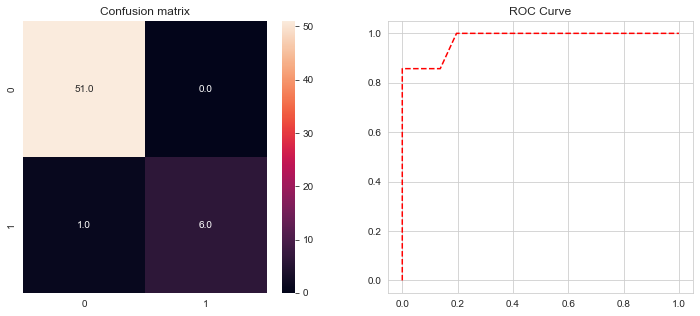

In [24]:
#predicting on the test data
pred = classifier.predict(x_test)
metrics(classifier,x_test,y_test,pred)

* The testing F1-score is 92% which is good but,
* the training F1-Score is higher i,e 98% , this shows that our model is slightly overfitting

#### K-FOLD CROSS VALIDATION to reduce the overfitting

In [25]:

cv = StratifiedKFold(n_splits=5,random_state=22,shuffle=True)
scores = cross_val_score(classifier,X,y,scoring='f1',n_jobs=-1)
print("F1_Score:",np.mean(scores),"std:",np.std(scores))

F1_Score: 0.9426666666666668 std: 0.05681940200710008


* The testing f1-score now has been improved from 92% to 94.1%
* This slightly reduces the problem of overfitting

#### Hyperparameter tuning

In [26]:

params=param_grid = {'bootstrap': [True],
'max_depth': [1,4,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000]
}
grid = GridSearchCV(classifier,params,scoring='f1',n_jobs=-1,cv=5,verbose=2)
grid.fit(X,y)

Fitting 5 folds for each of 1170 candidates, totalling 5850 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [1, 4, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='f1', verbose=2)

In [27]:
print('Best params:',grid.best_params_)
print('Best Score:',grid.best_score_)
grid.best_estimator_

Best params: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best Score: 0.9426666666666668


RandomForestClassifier(max_depth=20, n_estimators=400)

Training score after hyperparameter tuning: 0.9734513274336283
Testing F1-Score: 1.0
AUC Score: 1.0
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00         7

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



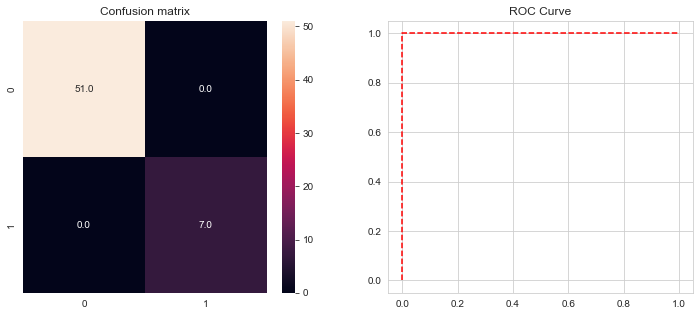

In [28]:
train_pred = grid.predict(x_train)
test_pred = grid.predict(x_test)
print('Training score after hyperparameter tuning:',f1_score(y_train,train_pred))
metrics(grid,x_test,y_test,test_pred)

* *The testing f1_score improved gradually from 94% to 99%*
* *The Training f1_score is 97%*
* *The overfitting problem has been removed*

Text(0.5, 1.0, 'Feature Importances')

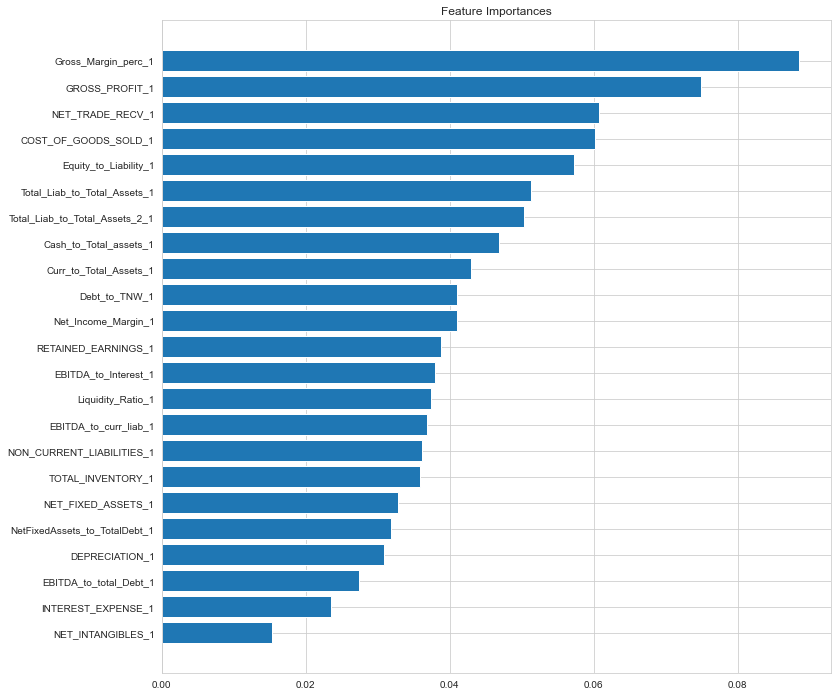

In [29]:
feat_imps=pd.DataFrame(classifier.feature_importances_,index=x_train.columns,columns=['Scores'])
feat_imps.sort_values(by='Scores',inplace=True,ascending=True)
plt.figure(figsize=(12,12))
plt.barh(width=feat_imps['Scores'],y=feat_imps.index)
plt.title('Feature Importances')

In [32]:
print('The most important features for predicting the default are:',list(feat_imps.index[:5]))

The most important features for predicting the default are: ['NET_INTANGIBLES_1', 'INTEREST_EXPENSE_1', 'EBITDA_to_total_Debt_1', 'DEPRECIATION_1', 'NetFixedAssets_to_TotalDebt_1']
